# Machine Learning Models

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

In [58]:
## classification ml:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [59]:
## regression ml
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree.export import export_text
from sklearn.neighbors import KNeighborsRegressor

In [60]:
### evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
### optimize model
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, FastICA

In [62]:
ds = pd.read_csv('./data/datamax_cleaned.csv', index_col=0)

In [63]:
ds.head()

,PB140: YEAR OF BIRTH,PB150: SEX,PB190: MARITAL STATUS,PB200: CONSENSUAL UNION,PB220A: CITIZENSHIP,PE010: CURRENT EDUCATION ACTIVITY,PE040: HIGHEST ISCED LEVEL ATTAINED,PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK,PL051: OCCUPATION (ISCO-08 (COM)),...,PW130: TRUST IN THE POLITICAL SYSTEM.1,PW140: TRUST IN THE LEGAL SYSTEM,PW150: TRUST IN THE POLICE,PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS,PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH),PW180: HELP FROM OTHERS,PW190: TRUST IN OTHERS,PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS,PW210: SATISFACTION WITH LIVING ENVIRONMENT,PW220: PHYSICAL SECURITY
54,50,1,1.0,3,0,2,5.0,1.0,1,43.0,...,2.0,4.0,10.0,7.0,1.0,1.0,7.0,10.0,7.0,3.0
68,36,1,2.0,1,0,2,3.0,1.0,1,43.0,...,9.0,6.0,9.0,3.0,9.0,1.0,7.0,10.0,10.0,2.0
97,37,0,1.0,1,0,2,3.0,1.0,1,32.0,...,2.0,99.0,8.0,8.0,9.0,1.0,4.0,0.0,9.0,2.0
100,47,1,2.0,1,1,2,4.0,1.0,1,32.0,...,2.0,2.0,5.0,8.0,1.0,1.0,2.0,8.0,9.0,2.0
141,84,1,2.0,2,0,2,3.0,7.0,2,72.0,...,4.0,9.0,8.0,99.0,1.0,1.0,1.0,6.0,8.0,2.0


In [64]:
#subsets
background = ['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP']

education = ['PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED']

work = ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))']

health = ['PH010: GENERAL HEALTH',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT']

job= ['PY010G: INCOME', 'PY090G++: SOCIAL BENEFITS']



bneeds= ['PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity']



sat =['PW010: OVERALL LIFE SATISFACTION', 'PW020: MEANING OF LIFE',
       'PW030: SATISFACTION WITH FINANCIAL SITUATION',
       'PW040: SATISFACTION WITH ACCOMMODATION', 'PW050: BEING VERY NERVOUS',
       'PW060: FEELING DOWN IN THE DUMPS', 'PW070: FEELING CALM AND PEACEFUL',
       'PW080: FEELING DOWNHEARTED OR DEPRESSED', 'PW090: BEING HAPPY',
       'PW120: SATISFACTION WITH TIME USE',
       'PW130: TRUST IN THE POLITICAL SYSTEM',
       'PW140: TRUST IN THE LEGAL SYSTEM', 'PW150: TRUST IN THE POLICE',
       'PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS',
       'PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)',
       'PW180: HELP FROM OTHERS', 'PW190: TRUST IN OTHERS',
       'PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS',
       'PW210: SATISFACTION WITH LIVING ENVIRONMENT',
       'PW220: PHYSICAL SECURITY']

subsets= [background,education,work,health,job,bneeds, sat]
columns = []
for x in subsets:
    for y in x:
        columns.append (y)
columns

['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PH010: GENERAL HEALTH',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PY010G: INCOME',
 'PY090G++: SOCIAL BENEFITS',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
 'PD060: Regularly participate in a leisure activity',
 'PW010: OVERALL LIFE SATISFACTION',
 'PW020: MEANING OF LIFE',
 'PW030: SATISFACTION WITH FINANCIAL SITUATION',
 'PW040: SATISFACTION WITH ACCOMMODATION',
 'PW050: BEING VERY NERVOUS',
 'PW060: FEELING DOWN IN THE DUMPS',
 'PW070: FEELING CALM AND PEACEFUL',
 'PW080: FEELING DOWNHEARTED OR DEPRESSED',
 'PW090: BEIN

# 0 Superfunctions

In [65]:
# refresh ds
def reload():
    return pd.read_csv('./data/datamax_cleaned.csv', index_col=0)

## 0.1 binning

In [66]:
def pbin(column_to_bin, x):
    bin_labels = [x for x in range(0,x)]

    equal_bins = pd.cut(ds[column_to_bin], x, labels = bin_labels)
    return equal_bins

def qbin(column_to_bin, x):
    bin_labels = [x for x in range(0,x)]

    equal_bins = pd.qcut(ds[column_to_bin], x, labels = bin_labels)
    return equal_bins

In [67]:
binned =pbin('PY010G: INCOME',5)

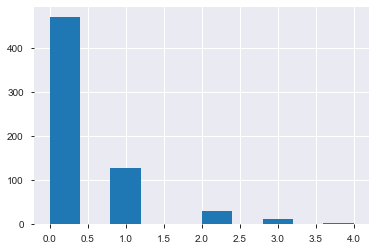

In [68]:
binned.hist()

## 0.2 generate train and test

In [69]:
### generate tests with several binning
# binning first
def generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse):
    outcome = ds[y_interested]
    features = ds[X_interested]
    outcomelist=y_interested
    featureslist=X_interested
    data =pd.merge(features, outcome, left_index=True, right_index=True)
    
    # create dummy
    categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD080: Internet connection for personal use at home',
      ]
    


    create_dummy=set(featureslist).intersection(categorical)
    data_dummy = pd.get_dummies(data, columns=create_dummy, drop_first=True)
    if dummy=='yes':
        data = data_dummy
    
    ## drop na in outcome
    if drop_na_in_y == 'yes':
        data = data[data[outcomelist]>=0]
    
    ## split dataset again in x and y
    XCol=list(data.columns)
    XCol.remove(outcomelist)
    YCol=outcomelist
    Xtouse = data[XCol]
    y= data[YCol]

    
    # scaler
    if scalertouse == "Standard":
        scaler = StandardScaler()
        X_ = scaler.fit_transform(Xtouse)
    elif scalertouse == "MinMax":
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_ = scaler.fit_transform(Xtouse)
        X_.shape
    elif scalertouse == "Normalizer":
        scaler = Normalizer()
        X_ = scaler.fit_transform(Xtouse)
        X_.shape
    else: 
        X_ = Xtouse
    
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

## 0.2  Regression

In [70]:
# maxximize function to split and run all the models:

def regmodel (X_interested,y_interested, dummy, drop_na_in_y, scalertouse):

    X_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[0]
    X_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[1]
    y_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[2]
    y_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[3]

    
    print("X: ", X_interested)
    print("Y: ", y_interested,"\n")
    
    # Linear Regression
    lm = LinearRegression()
    model = lm.fit(X_train,y_train)

    print("Intercept: ", lm.intercept_)
    print("Coef: ", lm.coef_)

    y_pred  = lm.predict(X_test)
    print ("linear aMSE: ", mean_absolute_error(y_test, y_pred))
    print ("linear MSE: ",mean_squared_error(y_test, y_pred))
    print ("linear R2: ",r2_score(y_test, y_pred), "\n")
    
    
    ### Regression Tree
    regr = DecisionTreeRegressor(random_state = 29)
    model = regr.fit(X_train, y_train)
    y_pred  = regr.predict(X_test)
    regr.score(X_test, y_test)
    print ("Regression Tree aMSE: ", mean_absolute_error(y_test, y_pred))
    print ("Regression Tree MSE: ",mean_squared_error(y_test, y_pred))
    print ("Regression Tree R2: ",r2_score(y_test, y_pred),"\n")
    
    ### KNeighborsRegressor
    knnr = KNeighborsRegressor(n_neighbors = 3)
    model = knnr.fit(X_train, y_train)  #fit the model
    y_pred = knnr.predict(X_test)
    print ("KNeighbores aMSE: ", mean_absolute_error(y_test, y_pred))
    print ("KNeighbores MSE: ",mean_squared_error(y_test, y_pred))
    print ("KNeighbores R2: ",r2_score(y_test, y_pred))

In [71]:
regmodel(bneeds,'PW130: TRUST IN THE POLITICAL SYSTEM', 'yes', 'yes', 'no')

X:  ['PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month', 'PD060: Regularly participate in a leisure activity']
Y:  PW130: TRUST IN THE POLITICAL SYSTEM 

Intercept:  11.990191911814883
Coef:  [-2.08163754 -2.21763927 -4.07052401 -2.25804326]
linear aMSE:  8.950238969322319
linear MSE:  404.53252122745505
linear R2:  -0.018047319820630126 

Regression Tree aMSE:  9.017564748881966
Regression Tree MSE:  407.6419280687379
Regression Tree R2:  -0.02587245904897939 

KNeighbores aMSE:  8.13953488372093
KNeighbores MSE:  469.4418604651163
KNeighbores R2:  -0.1813982876036977


## 0.4  Classification

In [72]:
# maxximize function to split and run all the models:
## y binning first
def class_bin (X_interested,y_interested, dummy, drop_na_in_y, scalertouse):

    X_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[0]
    X_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[1]
    y_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[2]
    y_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[3]

    
    print("X: ", X_interested)
    print("Y: ", y_interested, "\n")
    
    # logistic regression
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    conf=confusion_matrix(y_test, y_pred)
    #tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
    #matrix = pd.DataFrame([[tp, tn, (tp+tn),round((tp+tn)/(tp+tn+fp+fn)*100,2)],[fp, fn, (fp+fn), ]], index = ["true", "false"], columns=['positive', 'negative', 'total','accuracy'])
    #print(matrix)
    print( "Logistic regression - accuracy: ", str(round(lr.score(X_test, y_test)*100,2)))
    print( "Logistic regression - precision", str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)), "\n")

    # Decision Tree classyier
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    conf=confusion_matrix(y_test, y_pred)
    #tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
    #matrix = pd.DataFrame([[tp, tn, (tp+tn),round((tp+tn)/(tp+tn+fp+fn)*100,2)],[fp, fn, (fp+fn), ]], index = ["true", "false"], columns=['positive', 'negative', 'total','accuracy'])
    #print(matrix)
    print( "Decision tree - accuracy  ", str(round(dtc.score(X_test, y_test)*100,2)))
    print( "Decision tree - precision", str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)), "\n")  
      
    # super vector machine (takes too much time)                                          
                                                   
    # KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    conf=confusion_matrix(y_test, y_pred)
    #tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
    #matrix = pd.DataFrame([[tp, tn, (tp+tn),round((tp+tn)/(tp+tn+fp+fn)*100,2)],[fp, fn, (fp+fn), ]], index = ["true", "false"], columns=['positive', 'negative', 'total','accuracy'])
    print(conf)
    print( "KNeighborsClassifier - accuracy  ", str(round(knn.score(X_test, y_test)*100,2)))
    print( "KNeighborsClassifier - precision", str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)), "\n") 

In [73]:
class_bin(background, 'PW130: TRUST IN THE POLITICAL SYSTEM', 'yes' , 'yes', 'MaxMin')

X:  ['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS', 'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP']
Y:  PW130: TRUST IN THE POLITICAL SYSTEM 

Logistic regression - accuracy:  23.26
Logistic regression - precision nan 

Decision tree - accuracy   11.63
Decision tree - precision 50.0 

[[2 1 1 0 1 2 1 2 0 0 0]
 [2 0 1 2 0 3 1 0 1 0 0]
 [0 1 0 2 1 4 0 0 0 0 0]
 [0 0 0 2 0 3 2 2 0 0 0]
 [0 1 0 4 0 5 0 0 0 0 0]
 [5 5 5 2 2 6 4 1 1 0 0]
 [1 2 1 1 1 2 0 0 1 0 1]
 [2 0 2 2 3 4 0 3 0 0 0]
 [3 1 4 1 0 3 1 2 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0]
 [2 0 0 0 1 1 4 0 0 0 0]]
KNeighborsClassifier - accuracy   10.08
KNeighborsClassifier - precision 50.0 



C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars


In [74]:
def tryclass_bin(xes,yli,nrbinx, dummy, drop_na_in_y, scalertouse):
    ds=reload()
    # x biningfor x in try1:
    for x in xes:
        if len(ds[x].unique())>nrbinx:
               ds[x]=pbin(x,nrbinx)
    # y binning
    for x in xes: 
        print(x, ds[x].unique())
    ds['binned_y']= pbin(yli,2)
    print(ds['binned_y'].unique())
    
    # run
    class_bin (xes,yli, dummy, drop_na_in_y, scalertouse)

mulit class

In [75]:
## target multi
# binning first
def class_mul (X_interested,y_interested, dummy, drop_na_in_y, scalertouse):
    
    X_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[0]
    X_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[1]
    y_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[2]
    y_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[3]

    
    print("X: ", X_interested)
    print("X: ", y_interested)
    
    #### b) DecisionTree Classify

    dtc = DecisionTreeClassifier()#class_weight='balanced')#max_features=10,
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)

    acc = dtc.score(X_test, y_test)*100
    print(f"Decision Tree Test Accuracy {round(acc, 2)}%")
 

    #### c) Support Vector Maschine
    svm = SVC(decision_function_shape='ovo')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = svm.score(X_test,y_test)*100
    print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

In [76]:
# test
class_mul(background, sat[0], 'yes' , 'no', 'MaxMin')

X:  ['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS', 'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP']
X:  PW010: OVERALL LIFE SATISFACTION
Decision Tree Test Accuracy 19.38%
SVM Algorithm Test Accuracy 27.91%


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [77]:
# combine binnen y and run modell
def tryclass_multi(xes,yli,nrbinx, nrbiny,dummy, drop_na_in_y, scalertouse):
    ds=reload()
    # x biningfor x in try1:
    for x in xes:
        if len(ds[x].unique())>nrbinx:
               ds[x]=pbin(x,nrbinx)
    # y binning
    for x in xes: 
        print(x, ds[x].unique())
    ds['binned_y']= pbin(yli,nrbiny)
    print(ds['binned_y'].unique())
    
    # run
    class_mul(xes, 'binned_y', dummy, drop_na_in_y, scalertouse)

In [78]:
#tryclass_multi(background, sat[3], 2,2,  'yes' , 'no', 'MaxMin')

## 0.4 RFE

In [79]:
def generateRFE (X_train, y_train, limit): 
    auto_model = LinearRegression()
    selector = RFE(auto_model, 5, step=1)
    model = selector.fit(X_train,y_train)
    selector.ranking_
    rfe_col = []
    for x in range(len(X_train.columns)):
        if selector.ranking_[x]<=limit:
            rfe_col.append(X_train.columns[x])
    print(len(rfe_col))
    return rfe_col

# 1. apply to models

## 1.1 model 1 "political satisfaction"

In [80]:
columns

['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PH010: GENERAL HEALTH',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PY010G: INCOME',
 'PY090G++: SOCIAL BENEFITS',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
 'PD060: Regularly participate in a leisure activity',
 'PW010: OVERALL LIFE SATISFACTION',
 'PW020: MEANING OF LIFE',
 'PW030: SATISFACTION WITH FINANCIAL SITUATION',
 'PW040: SATISFACTION WITH ACCOMMODATION',
 'PW050: BEING VERY NERVOUS',
 'PW060: FEELING DOWN IN THE DUMPS',
 'PW070: FEELING CALM AND PEACEFUL',
 'PW080: FEELING DOWNHEARTED OR DEPRESSED',
 'PW090: BEIN

#### a) selection of features by logic

In [81]:
ds = reload()
## selection of features by logic
try1 = ['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PH010: GENERAL HEALTH',
 'PY010G: INCOME',
 'PY090G++: SOCIAL BENEFITS',
 'PD080: Internet connection for personal use at home','PW010: OVERALL LIFE SATISFACTION']

In [82]:
regmodel (try1,'PW130: TRUST IN THE POLITICAL SYSTEM','yes' , 'yes', 'Normalizer')

X:  ['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS', 'PE040: HIGHEST ISCED LEVEL ATTAINED', 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PH010: GENERAL HEALTH', 'PY010G: INCOME', 'PY090G++: SOCIAL BENEFITS', 'PD080: Internet connection for personal use at home', 'PW010: OVERALL LIFE SATISFACTION']
Y:  PW130: TRUST IN THE POLITICAL SYSTEM 

Intercept:  33.929198665035116
Coef:  [-4.14890132e+01 -7.06080835e+01 -2.49407670e+01 -2.09262685e+01
  3.50061802e+01  2.75879128e+02 -3.57736980e+02 -1.44455467e+02
  7.81364717e+02 -6.57027102e+02 -2.89573061e+02  3.13937293e+02
 -3.07238694e+04 -4.15837748e+04  9.64225079e+02 -1.54756872e+02
 -2.01273083e+02  1.01170146e+03  5.17500893e+02  8.18322521e+02
  1.09606187e+02 -7.17146345e+02 -2.11514429e+02 -8.31948910e+02
  9.01575690e+02]
linear aMSE:  9.80170128052644
linear MSE:  464.1799550672513
linear R2:  -0.009037032196011374 

Regression Tree aMSE:  9.023255813953488
Regression Tree MSE:  632.031007751938
Regression Tree 

In [83]:
yli='PW130: TRUST IN THE POLITICAL SYSTEM'
tryclass_bin(try1,'PW130: TRUST IN THE POLITICAL SYSTEM',3, 'yes' , 'yes', 'Normalizer')

PB140: YEAR OF BIRTH [1, 0, 2]
Categories (3, int64): [0 < 1 < 2]
PB150: SEX [1 0]
PB190: MARITAL STATUS [0, 2, 1]
Categories (3, int64): [0 < 1 < 2]
PE040: HIGHEST ISCED LEVEL ATTAINED [2, 1, 0]
Categories (3, int64): [0 < 1 < 2]
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS [0, 1, 2]
Categories (3, int64): [0 < 1 < 2]
PH010: GENERAL HEALTH [1, 0, 2]
Categories (3, int64): [0 < 1 < 2]
PY010G: INCOME [0, 2, 1]
Categories (3, int64): [0 < 1 < 2]
PY090G++: SOCIAL BENEFITS [0, 1, 2]
Categories (3, int64): [0 < 1 < 2]
PD080: Internet connection for personal use at home [1. 3. 2.]
PW010: OVERALL LIFE SATISFACTION [0, 2]
Categories (2, int64): [0 < 2]
[0, 1]
Categories (2, int64): [0 < 1]
X:  ['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS', 'PE040: HIGHEST ISCED LEVEL ATTAINED', 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PH010: GENERAL HEALTH', 'PY010G: INCOME', 'PY090G++: SOCIAL BENEFITS', 'PD080: Internet connection for personal use at home', 'PW010: OVERALL LIFE SATISFAC

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in longlong_scalars


In [84]:
###  try2 only with prior features based on RFE

In [85]:
ds=reload()
try2 =generateRFE (ds[try1], ds['PW130: TRUST IN THE POLITICAL SYSTEM'], 2)

6


#### c) based on RFE- all

In [86]:
## based on RFE all columns
try3 = ['PE010: CURRENT EDUCATION ACTIVITY',
 'PL150: MANAGERIAL POSITION',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
 'PD070: Spend a small amount of money each week on yourself',
 'PW070: FEELING CALM AND PEACEFUL',
 'PW220: PHYSICAL SECURITY']

#try3
xes = generateRFE(ds[columns], ds[yli], 8)

12


RFE with Dummy-Features

In [87]:
## do rfe with dummy-features
ds=reload()
categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]
#columns.remove(yli)
create_dummy=set(columns).intersection(categorical)
create_dummy

{'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
 'PD060: Regularly participate in a leisure activity',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))'}

In [88]:
data_dummy = pd.get_dummies(ds[columns], columns=create_dummy, drop_first=True)
data_dummy.columns
data_dummy
generateRFE(data_dummy, ds[yli], 10)

14


['PW130: TRUST IN THE POLITICAL SYSTEM',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_4.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_12.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_26.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_32.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_34.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_43.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_54.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_73.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_75.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_93.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_94.0',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT_2',
 'PD060: Regularly participate in a leisure activity_3.0']

In [89]:
try4 = generateRFE(data_dummy, ds[yli], 10)

14


In [90]:
X = data_dummy[try4]
y= ds[yli]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [91]:
#### b) DecisionTree Classify

dtc = DecisionTreeClassifier()#class_weight='balanced')#max_features=10,
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc, 2)}%")
 

#### c) Support Vector Maschine
svm = SVC(decision_function_shape='ovo')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = svm.score(X_test,y_test)*100
print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

Decision Tree Test Accuracy 100.0%
SVM Algorithm Test Accuracy 100.0%


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### <span style="color:red"> Conclusion: No Model with accuracy</span>

#### a) selection of features by logic

In [98]:
ds = reload()
## selection of features by logic
try1 = ['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PH010: GENERAL HEALTH',
 'PW010: OVERALL LIFE SATISFACTION',
 'PW080: FEELING DOWNHEARTED OR DEPRESSED',
 'PW090: BEING HAPPY',
 'PW180: HELP FROM OTHERS',
 'PW190: TRUST IN OTHERS']

ds=ds[ds['PY010G: INCOME']!=0]

count       393.000000
mean      29572.861221
std       24001.205225
min          93.570000
25%       11053.060000
50%       25937.860000
75%       39237.530000
max      144068.630000
Name: PY010G: INCOME, dtype: float64

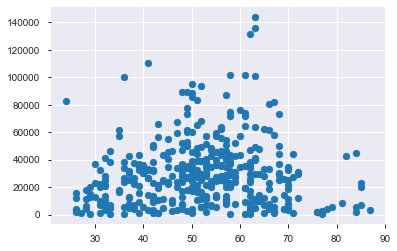

In [95]:
plt.scatter(ds['PB140: YEAR OF BIRTH'],ds['PY010G: INCOME'])
ds['PY010G: INCOME'].describe()

In [96]:
regmodel('PB140: YEAR OF BIRTH','PY010G: INCOME','yes' , 'no', 'Normalizer')

X:  PB140: YEAR OF BIRTH
Y:  PY010G: INCOME 

Intercept:  30519.331496815284
Coef:  [0.]
linear aMSE:  17605.733448762392
linear MSE:  529604547.9987507
linear R2:  -0.0013134368864442525 

Regression Tree aMSE:  17605.733448762396
Regression Tree MSE:  529604547.9987505
Regression Tree R2:  -0.0013134368864440304 

KNeighbores aMSE:  19169.65447257384
KNeighbores MSE:  561527233.334379
KNeighbores R2:  -0.06166906239768499


In [99]:
tryclass_bin(try1,'PW130: TRUST IN THE POLITICAL SYSTEM',3, 'yes' , 'no', 'Normalizer')

PB140: YEAR OF BIRTH [1, 0, 2, NaN]
Categories (3, int64): [0 < 1 < 2]
PB150: SEX [1 0]
PB190: MARITAL STATUS [0, NaN, 2, 1]
Categories (3, int64): [0 < 1 < 2]
PE040: HIGHEST ISCED LEVEL ATTAINED [2, 1, NaN, 0]
Categories (3, int64): [0 < 1 < 2]
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS [0, 1, NaN, 2]
Categories (3, int64): [0 < 1 < 2]
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK [1 2]
PL051: OCCUPATION (ISCO-08 (COM)) [1, 0, 2, NaN]
Categories (3, int64): [0 < 1 < 2]
PH010: GENERAL HEALTH [1, 0, NaN, 2]
Categories (3, int64): [0 < 1 < 2]
PW010: OVERALL LIFE SATISFACTION [0, NaN, 2]
Categories (2, int64): [0 < 2]
PW080: FEELING DOWNHEARTED OR DEPRESSED [1, 0, 2, NaN]
Categories (3, int64): [0 < 1 < 2]
PW090: BEING HAPPY [0, NaN, 2, 1]
Categories (3, int64): [0 < 1 < 2]
PW180: HELP FROM OTHERS [1. 9. 2.]
PW190: TRUST IN OTHERS [0, NaN, 2]
Categories (2, int64): [0 < 2]
[0, NaN, 1]
Categories (2, int64): [0 < 1]
X:  ['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATU

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars


In [ ]:
#tryclass_multi(xes,yli,nrbinx, nrbiny)
#tryclass_multi(try1,'PW130: TRUST IN THE POLITICAL SYSTEM',4,4, 'yes' , 'yes', 'Normalizer')

In [ ]:
###  try2 only with prior features based on RFE

In [100]:
ds=reload()
try2 =generateRFE (ds[try1], ds['PW130: TRUST IN THE POLITICAL SYSTEM'], 2)

6


In [101]:
#for x in range(2,6):
 #   tryclass_multi(try1,'PW130: TRUST IN THE POLITICAL SYSTEM',x,x, 'yes' , 'yes', 'Normalizer')


other way of binning:


ds=reload()
ds[yli]=ds[yli].apply(lambda x: 2 if (x <=2) & (x!=-1) else x)
ds[yli]=ds[yli].apply(lambda x: 4 if (x ==3) & (x==4) else x)
ds[yli]=ds[yli].apply(lambda x: 4 if (x ==3) & (x==4) else x)
ds[yli] =ds[yli].apply(lambda x: 6 if ((x ==6) | (x==7)) else x)
ds[yli].unique()
ds[yli].hist()

#### c) based on RFE- all

In [115]:
## based on RFE all columns
try3 = ['PE010: CURRENT EDUCATION ACTIVITY',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
 'PW070: FEELING CALM AND PEACEFUL',
 'PW220: PHYSICAL SECURITY']

#try3
xes = generateRFE(ds[try3], ds[yli], 8)

4


RFE with Dummy-Features

In [116]:
## do rfe with dummy-features
ds=reload()
categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]
#columns.remove(yli)
create_dummy=set(columns).intersection(categorical)
create_dummy

{'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
 'PD060: Regularly participate in a leisure activity',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))'}

In [118]:
#### b) DecisionTree Classify

dtc = DecisionTreeClassifier()#class_weight='balanced')#max_features=10,
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc, 2)}%")
 

#### c) Support Vector Maschine
svm = SVC(decision_function_shape='ovo')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = svm.score(X_test,y_test)*100
print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

Decision Tree Test Accuracy 100.0%
SVM Algorithm Test Accuracy 100.0%


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### <span style="color:red"> Conclusion: No Model with accuracy</span>